In [24]:
# Set up vitual environment with necessary parkages 
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
import folium as fol
import missingno as msno
import matplotlib.pyplot as plt

In [2]:
# Load data
dt = pd.read_csv('p2-arbres-fr.csv', encoding = 'latin', sep = ';', decimal = '.')
df = pd.DataFrame(dt)
#df.head()
df.tail()

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
200132,2024741,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170151,NaN,Castanea,fargesii,NaN,0,0,NaN,0.0,48.821957,2.456264
200133,2024742,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170152,Arbre aux mouchoirs,Davidia,involucrata,NaN,0,0,NaN,0.0,48.823254,2.457935
200134,2024743,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170153,Peuplier,Populus,simonii,NaN,0,0,NaN,0.0,48.822907,2.457970
200135,2024744,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170154,ChÃªne,Quercus,n. sp.,NaN,0,0,NaN,0.0,48.822522,2.455956
200136,2024745,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170155,Raisinier,Hovenia,dulcis,NaN,0,0,NaN,0.0,48.820445,2.454856


In [3]:
# Shape of data
df.shape

(200137, 18)

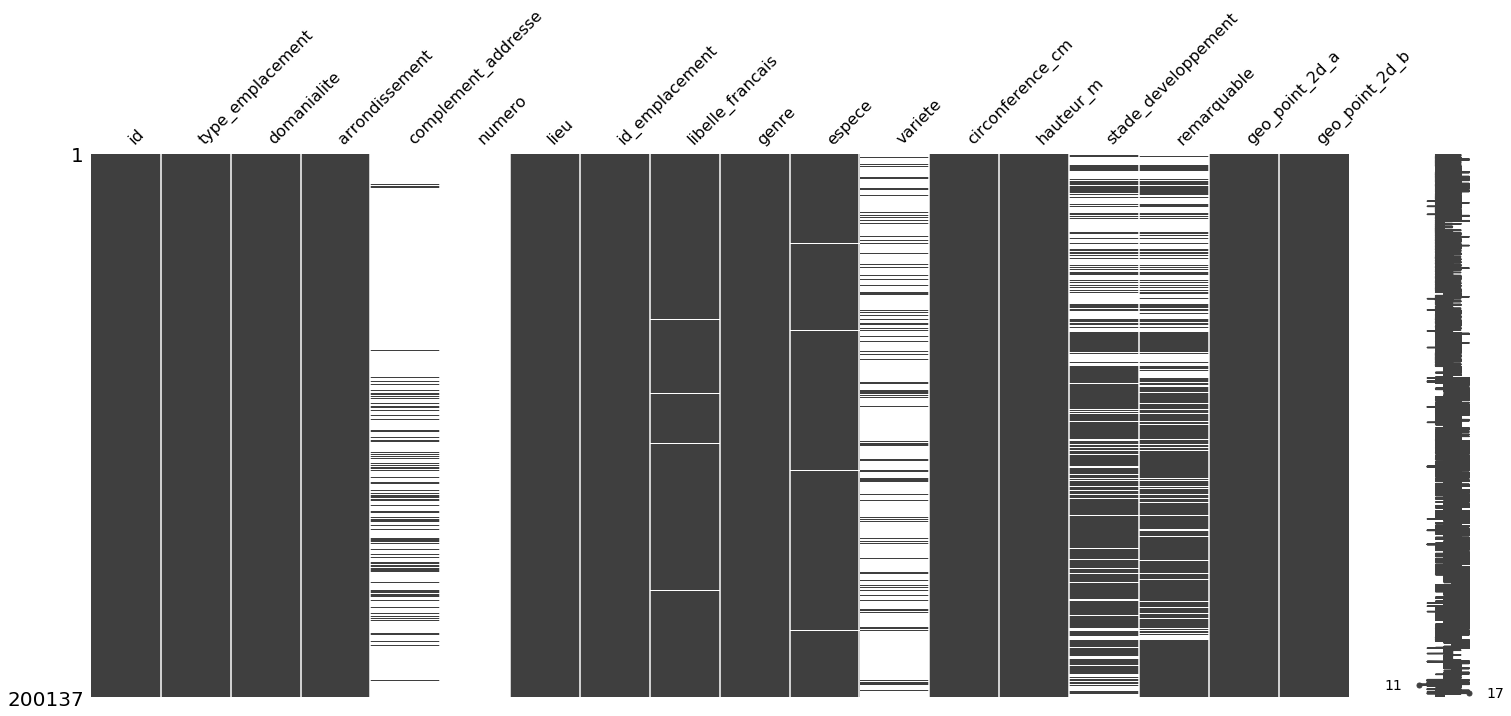

In [4]:
# plot distrbution of the null values
msno.matrix(df)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 18 columns):
id                     200137 non-null int64
type_emplacement       200137 non-null object
domanialite            200136 non-null object
arrondissement         200137 non-null object
complement_addresse    30902 non-null object
numero                 0 non-null float64
lieu                   200137 non-null object
id_emplacement         200137 non-null object
libelle_francais       198640 non-null object
genre                  200121 non-null object
espece                 198385 non-null object
variete                36777 non-null object
circonference_cm       200137 non-null int64
hauteur_m              200137 non-null int64
stade_developpement    132932 non-null object
remarquable            137039 non-null float64
geo_point_2d_a         200137 non-null float64
geo_point_2d_b         200137 non-null float64
dtypes: float64(4), int64(3), object(11)
memory usage: 27.5+ MB


In [6]:
#Detecter les valeurs manquantes 
df.isnull().sum()

id                          0
type_emplacement            0
domanialite                 1
arrondissement              0
complement_addresse    169235
numero                 200137
lieu                        0
id_emplacement              0
libelle_francais         1497
genre                      16
espece                   1752
variete                163360
circonference_cm            0
hauteur_m                   0
stade_developpement     67205
remarquable             63098
geo_point_2d_a              0
geo_point_2d_b              0
dtype: int64

In [15]:
dfN = df.copy()
dfN

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre Ã miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289
5,99879,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0036,Arbre Ã miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890470,2.315228
6,99880,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0035,Arbre Ã miel,Tetradium,daniellii,NaN,37,0,NaN,NaN,48.890504,2.315168
7,99881,Arbre,Jardin,PARIS 16E ARRDT,NaN,NaN,SQUARE ALEXANDRE ET RENE PARODI / 1 PLACE DE L...,35,Platane,Platanus,x hispanica,NaN,260,17,NaN,NaN,48.876722,2.280222
8,99882,Arbre,Jardin,PARIS 16E ARRDT,NaN,NaN,JARDIN DE L AVENUE FOCH / 10 AVENUE FOCH,802008,Sophora,Sophora,japonica,NaN,145,14,A,0.0,48.871990,2.275814
9,99883,Arbre,Jardin,PARIS 16E ARRDT,NaN,NaN,JARDIN DE L AVENUE FOCH / 10 AVENUE FOCH,802009,Sophora,Sophora,japonica,NaN,135,10,A,0.0,48.872046,2.275752


In [16]:
dfN.drop(['complement_addresse','numero'], inplace=True, axis=1)

In [17]:
dfN.head()

,id,type_emplacement,domanialite,arrondissement,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre Ã miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


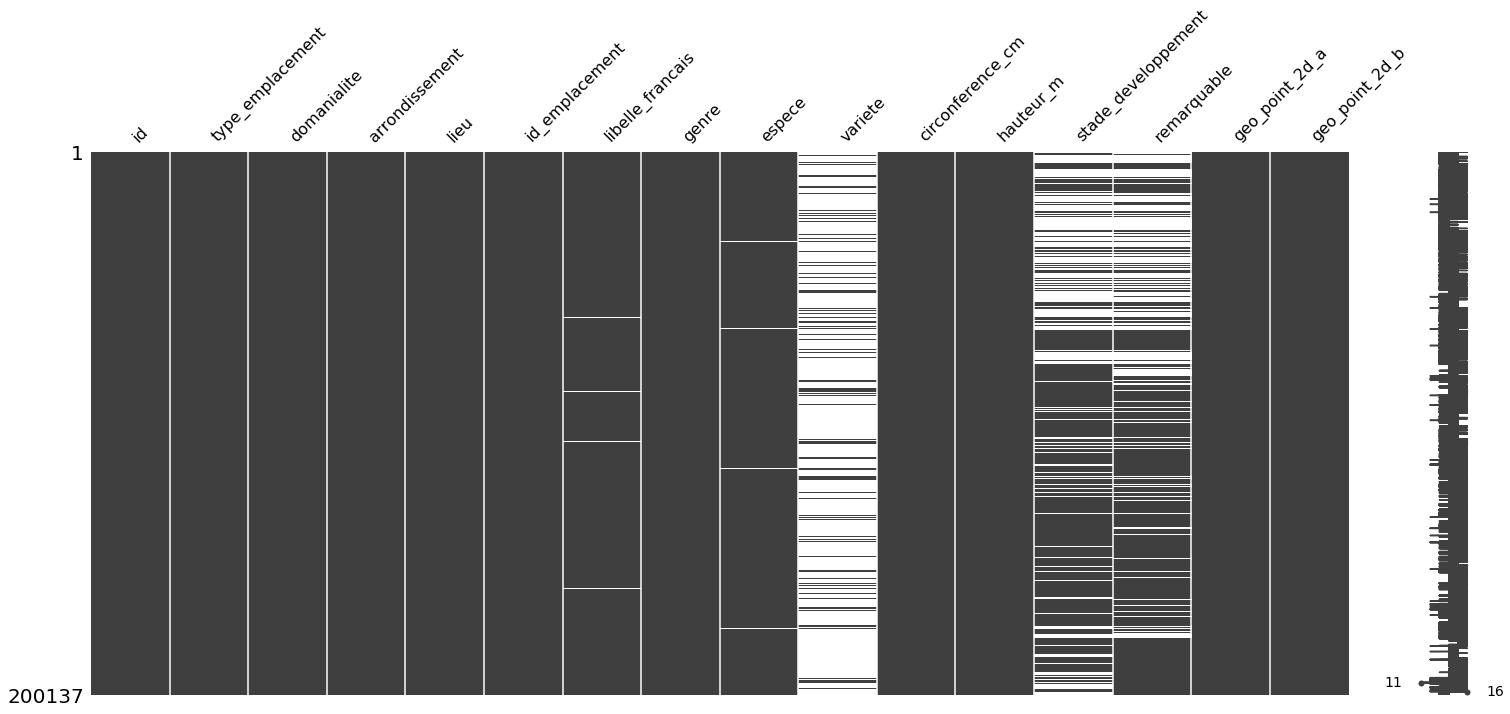

In [18]:
msno.matrix(dfN)

In [19]:
dfN['arrondissement'] = dfN['arrondissement'].str.title()
dfN['lieu'] = dfN['lieu'].str.title()
dfN['espece'] = dfN['espece'].str.capitalize()
dfN.head()

,id,type_emplacement,domanialite,arrondissement,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,Paris 7E Arrdt,Mairie Du 7E 116 Rue De Grenelle Paris 7E,19,Marronnier,Aesculus,Hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,Paris 7E Arrdt,Mairie Du 7E 116 Rue De Grenelle Paris 7E,20,If,Taxus,Baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,Paris 7E Arrdt,Mairie Du 7E 116 Rue De Grenelle Paris 7E,21,If,Taxus,Baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,Paris 7E Arrdt,Mairie Du 7E 116 Rue De Grenelle Paris 7E,22,Erable,Acer,Negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,Paris 17E Arrdt,Parc Clichy-Batignolles-Martin Luther King,000G0037,Arbre Ã miel,Tetradium,Daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


In [20]:
# unit normalization
dfN['circonference_cm'] = dfN['circonference_cm']/100
dfN.rename(columns={'circonference_cm':'circonference_m'}, inplace=True)
dfN.head()

,id,type_emplacement,domanialite,arrondissement,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_m,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,Paris 7E Arrdt,Mairie Du 7E 116 Rue De Grenelle Paris 7E,19,Marronnier,Aesculus,Hippocastanum,NaN,0.20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,Paris 7E Arrdt,Mairie Du 7E 116 Rue De Grenelle Paris 7E,20,If,Taxus,Baccata,NaN,0.65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,Paris 7E Arrdt,Mairie Du 7E 116 Rue De Grenelle Paris 7E,21,If,Taxus,Baccata,NaN,0.90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,Paris 7E Arrdt,Mairie Du 7E 116 Rue De Grenelle Paris 7E,22,Erable,Acer,Negundo,NaN,0.60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,Paris 17E Arrdt,Parc Clichy-Batignolles-Martin Luther King,000G0037,Arbre Ã miel,Tetradium,Daniellii,NaN,0.38,0,NaN,NaN,48.890435,2.315289


In [51]:
df.groupby('genre')['arrondissement'].count() 

genre
Abelia                   2
Abies                  120
Acacia                   9
Acca                     2
Acer                 18471
Aesculus             25341
Ailanthus              956
Alangium                 4
Albizia                244
Alnus                  675
Amelanchier            380
Aralia                  12
Araucaria               18
Arbutus                 16
Aronia                   4
Asimina                  1
Betula                2262
Brachychiton             1
Brahea                   2
Broussonetia           240
Buxus                   69
Callistemon              3
Calocedrus              64
Caragana                 1
Carica                   1
Carpinus              3495
Carya                   14
Castanea               178
Catalpa                591
Cedrus                 911
                     ...  
Sequoiadendron          62
Sophora              11830
Sorbus                 459
Staphylea                3
Stewartia                1
Styrax                

TypeError: Empty 'DataFrame': no numeric data to plot

In [33]:
df.groupby('espece')['arrondissement'].count()

espece
Fleur n. sp.                   16
Fruit n. sp.                   12
abies                         113
acalycina                       2
acerifolia                      6
acerifolius                     1
acuminata                       4
acutifolia                      1
acutissima                      4
adamii                          3
ailantifolia                    1
alaternus                       2
alba                         1314
albidum                         5
albosinensis                   17
alleghaniensis                  3
altissima                     943
ambigua                         1
americana                     761
americanum                      1
amurense                       17
amurensis                       1
anagyroides                    54
angustifolia                  860
antarctica                      5
antarctica var. uliginosa      21
aprica                          2
aquifolium                    340
araucana                       17
arborea